<a href="https://colab.research.google.com/github/CesarAF10/Simulaci-n-I/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

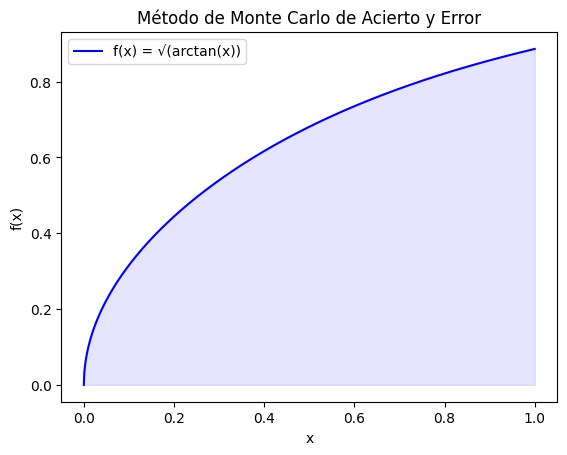

Estimación de la integral:  0.628424
Error estimado: ± 0.040250


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, atan

# Se define la función a integrar
""" La función a integrar es raíz cuadrada del arco tangente de x """
def f(x):
  return sqrt(atan(x))

def monte_carlo_acierto_y_error(f,a,b,y_max,n_samples):
  """
  f<- función a integrar
  a,b<- limites de integración
  y_max<- valor máximo de la función en el intervalo de integración
  n_samples<- número de muestras a generar
  """
  x_points = np.random.uniform(a,b,n_samples) # coordenadas aleatorias x distribuidas uniformemente
  y_points = np.random.uniform(0,y_max,n_samples) # coordenadas aleatorias y distribuidas uniformemente
  f_values = np.array([f(x) for x in x_points]) # valores de la función en las coordenadas aleatorias x
  aciertos = np.sum(y_points <= f_values) # número de aciertos
  """
  A continuación se empleará la integración por el método de Monte Carlo de error y acierto.
  En primer lugar voy a calcular el área del rectangulo para que al momento de integrar sea más sencillo
  Después voy a integrar
  """
  area_rectangulo = (b-a)*y_max
  area_monte_carlo = (aciertos/n_samples)*area_rectangulo
  error= area_rectangulo * np.sqrt((aciertos/n_samples)*(1-(aciertos/n_samples))/np.sqrt(n_samples))
  return area_monte_carlo, error
# Parametros
a,b=0,1
y_max= f(b) # Valor máximo de f en el intervalo de integración
n_samples = 10000

# Estimación de la integral
integral, error = monte_carlo_acierto_y_error(f,a,b,y_max,n_samples)
"""
Se graficará la función utilizando la librería matplolib.pyplot
"""
x_vals=np.linspace(a, b, 1000)
y_vals=[f(x) for x in x_vals]

plt.plot(x_vals, y_vals, 'b-', label='f(x) = √(arctan(x))')
plt.fill_between(x_vals, y_vals, color='blue', alpha=0.1)
plt.title('Método de Monte Carlo de Acierto y Error')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Resultados
print(f"Estimación de la integral: {integral: .6f}")
print(f"Error estimado: ±{error: .6f}")